# Udacity Data Analysis - Jarred Bowley

# Analyze TMDB dataset.

# I will clean the data and analyze certain aspects of the data.

In [42]:
#import programs used to analyze data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
#read the data and print out the first 5 lines
df = pd.read_csv('tmdb-movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# Cleaning the Data

In [63]:
#drop duplicate values
df.drop_duplicates(inplace=True)

In [45]:
#replace zero's with null values in budget and release year columns
df['budget'] = df['budget'].replace(0, np.NaN)
df['release_year'] = df['release_year'].replace(0, np.NaN)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  5169 non-null float64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              

In [46]:
#make sure nulls are 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                  5696
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  5169 non-null float64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              

# Question 1
# Does movie budgets increase over the year?
#I speculate that budgets do increase over time.

In [64]:
#calculate mean for budget and release year
budget_time = df.groupby('release_year').count()['budget']
budget_time.head()

release_year
1960     9
1961    13
1962    14
1963    11
1964    11
Name: budget, dtype: int64

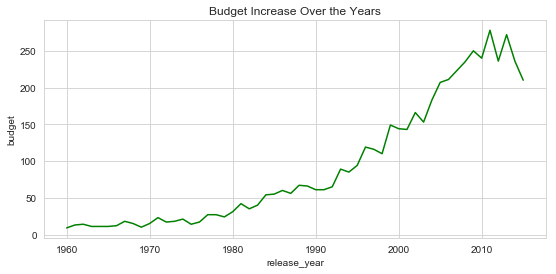

In [62]:
#Style
sns.set_style('whitegrid')
#x value
x = budget_time.index
#y value
y = budget_time
#chart size
plt.figure(figsize=(9, 4))
#color of line on chart
plt.plot(x, y, color = 'g', label = 'mean')
#Title and lables
plt.title('Budget Increase Over the Years')
plt.xlabel('release_year')
plt.ylabel('budget');

# The data shows that budgets do increase over the years.

# Question 2
# Are revenue and vote_average
#I suspect revenue and vote average are related to one another.

In [67]:
#calculate mean for budget and release year
revenue_voteavg = df.groupby('vote_average').count()['revenue']
revenue_voteavg.head()

vote_average
1.5    2
2.0    1
2.1    3
2.2    3
2.3    2
Name: revenue, dtype: int64

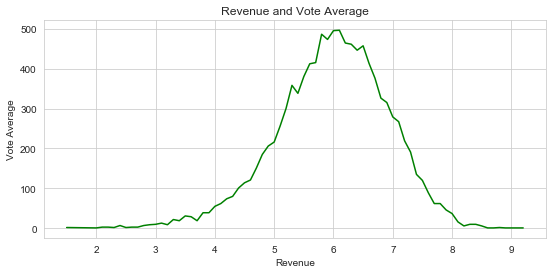

In [68]:
#Style
sns.set_style('whitegrid')
#x value
x = revenue_voteavg.index
#y value
y = revenue_voteavg
#chart size
plt.figure(figsize=(9, 4))
#color of line on chart
plt.plot(x, y, color = 'g', label = 'mean')
#Title and lables
plt.title('Revenue and Vote Average')
plt.xlabel('Revenue')
plt.ylabel('Vote Average');

# The data is inconclusive since the vote average peaks at 6 on the revenue scale.